In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
# from tqdm import tqdm
# from scipy import optimize as op

In [37]:
# df_NP = pd.read_csv('data/Au_NP.txt',sep='\t',header=18)
# df_base = pd.read_csv('data/HAuCl4_solution.txt',sep='\t',header=18)
# df_epsilon = pd.read_csv('data/epsilon_bulk_Au.txt',sep='\t')

# df_NP.to_csv('data/Au_NP.csv',index=False)
# df_base.to_csv('data/HAuCl4_solution.csv', index=False)
# df_epsilon.to_csv('data/epsilon_bulk_Au.csv',index=False)


df_NP = pd.read_csv('data/Au_NP.csv')
df_base = pd.read_csv('data/HAuCl4_solution.csv')
df_epsilon = pd.read_csv('data/epsilon_bulk_Au.csv')

def access(df,lam,key):
    lam_0 = df['lambda'][0]
    i = int(lam - lam_0)
    return df[key][i]

<IPython.core.display.Javascript object>


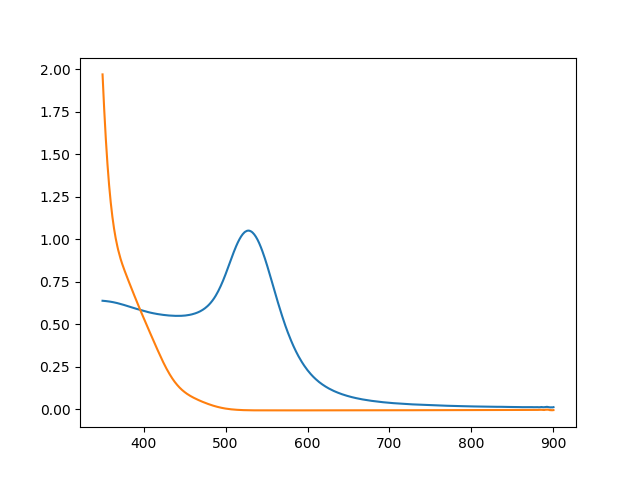

In [39]:
%matplotlib notebook
plt.figure()
plt.plot(df_NP['lambda'],df_NP['A'])
plt.plot(df_base['lambda'],df_base['A'])

<IPython.core.display.Javascript object>


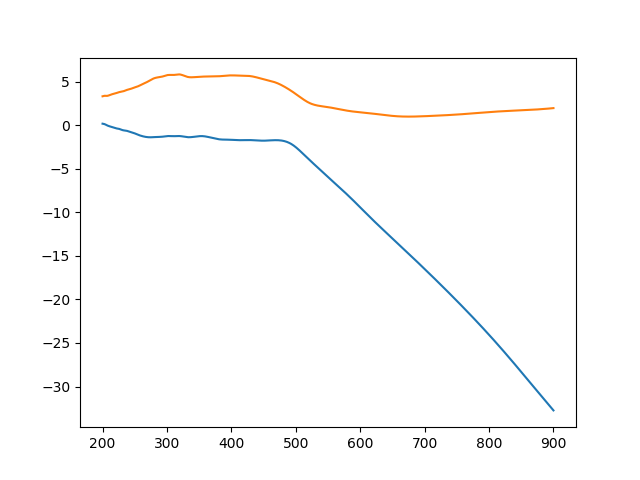

In [45]:
plt.figure()
plt.plot(df_epsilon['lambda'], df_epsilon['eps_1'])
plt.plot(df_epsilon['lambda'], df_epsilon['eps_2'])

In [46]:
z = 0.01*10**9 # thickness of the sample in nm


@np.vectorize
def absorbance(lam, eps_m, f):
    eps_1 = access(df_epsilon,lam,'eps_1')
    eps_2 = access(df_epsilon,lam,'eps_2')
    
    return 18*np.pi*z/(np.log(10)*lam)*eps_m**1.5*f*eps_2/((eps_1 + 2*eps_m)**2 + eps_2**2)
    


<IPython.core.display.Javascript object>


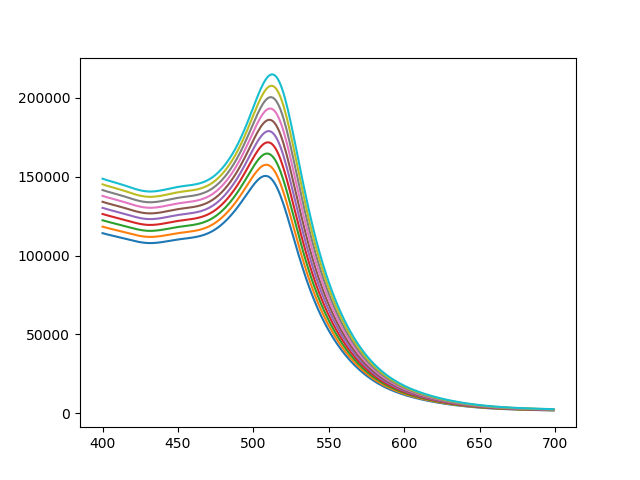

In [47]:
lams = np.arange(400,700)
eps_ms = np.sqrt(np.linspace(1.1,1.6,10))

plt.figure()
for eps_m in eps_ms:
    As = absorbance(lams,eps_m,1)
    plt.plot(lams,As)

In [69]:
def chi2(func, xdata, ydata, args):
    '''
    func(x, *args)
    '''
    return np.sum(ydata - func(xdata, *args))

def make_args_list(args):
    '''
    args is a list of arrays: each of them contains the possible values for that parameter
    '''
    lens = [len(a) for a in args]
    return np.array(np.meshgrid(*args)).T.reshape(np.product(lens),len(lens))
    
# def chi2_map(func, xdata, ydata, args_list):
    

In [70]:
a = np.arange(1,5)
b = np.arange(10,15)
c = np.arange(7,9)

make_args_list([a,b,c])

array([[ 1, 10,  7],
       [ 1, 11,  7],
       [ 1, 12,  7],
       [ 1, 13,  7],
       [ 1, 14,  7],
       [ 2, 10,  7],
       [ 2, 11,  7],
       [ 2, 12,  7],
       [ 2, 13,  7],
       [ 2, 14,  7],
       [ 3, 10,  7],
       [ 3, 11,  7],
       [ 3, 12,  7],
       [ 3, 13,  7],
       [ 3, 14,  7],
       [ 4, 10,  7],
       [ 4, 11,  7],
       [ 4, 12,  7],
       [ 4, 13,  7],
       [ 4, 14,  7],
       [ 1, 10,  8],
       [ 1, 11,  8],
       [ 1, 12,  8],
       [ 1, 13,  8],
       [ 1, 14,  8],
       [ 2, 10,  8],
       [ 2, 11,  8],
       [ 2, 12,  8],
       [ 2, 13,  8],
       [ 2, 14,  8],
       [ 3, 10,  8],
       [ 3, 11,  8],
       [ 3, 12,  8],
       [ 3, 13,  8],
       [ 3, 14,  8],
       [ 4, 10,  8],
       [ 4, 11,  8],
       [ 4, 12,  8],
       [ 4, 13,  8],
       [ 4, 14,  8]])

SyntaxError: can't use starred expression here (<ipython-input-64-2f92a7214c3e>, line 1)